In [ ]:
import tensorflow as tf
import os

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [56]:
data_dir='/content/drive/MyDrive/BrainTumorDetection_AI_21CSB0B18/DataSets/DataSet-01'

In [57]:
image_exts=['jpeg','jpg','bmp','png']

In [58]:
img=cv2.imread(os.path.join('/content/drive/MyDrive/BrainTumorDetection_AI_21CSB0B18/DataSets/DataSet-01','tm','debris.jpg'))

In [59]:
for img_cls in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,img_cls)):
        img_path=os.path.join(data_dir,img_cls,image)
        try:
            img=cv2.imread(img_path)
            tip=imghdr.what(img_path)
            if tip not in image_exts:
                print('image not here')
                os.remove(img_path)
        except Exception as e:
            print('issue with {}'.format(img_path))

In [ ]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/BrainTumorDetection_AI_21CSB0B18/DataSets/DataSet-01')

Found 250 files belonging to 2 classes.


In [ ]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int32)

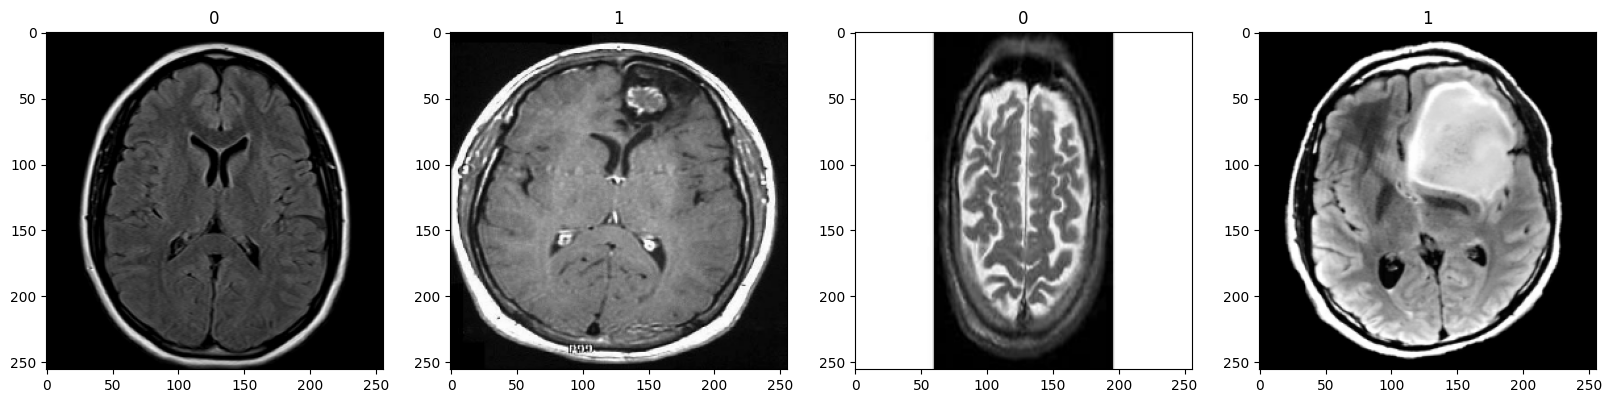

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data=data.map(lambda x,y:(x/255,y))#normalisation
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [ ]:
len(data)

8

In [ ]:
train_size=int(len(data)*.5)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [ ]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
model=Sequential()#try functional

#layer 1 - input layer.....16 fliters(3x3 pixels , stride of 1)
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D()) #max value after relu activation

#layer 2 - 32 fliters(3x3 pixels , stride of 1)
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D()) #max value after relu activation

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #gives the final output

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
logdir='div'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 15s 4s/step - loss: 0.7012 - accuracy: 0.6562 - val_loss: 0.6384 - val_accuracy: 0.6250
Epoch 2/20
4/4 [==============================] - 13s 3s/step - loss: 0.5768 - accuracy: 0.7109 - val_loss: 0.4264 - val_accuracy: 0.8594
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.5057 - accuracy: 0.7734 - val_loss: 0.4134 - val_accuracy: 0.8125
Epoch 4/20
4/4 [==============================] - 11s 2s/step - loss: 0.5004 - accuracy: 0.7578 - val_loss: 0.4821 - val_accuracy: 0.7656
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.4523 - accuracy: 0.7812 - val_loss: 0.3103 - val_accuracy: 0.8750
Epoch 6/20
4/4 [==============================] - 11s 2s/step - loss: 0.4359 - accuracy: 0.7734 - val_loss: 0.3625 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.3265 - accuracy: 0.8516 - val_loss: 0.2618 - val_accuracy: 0.8594
Epoch 8/20
4/4 [=====================

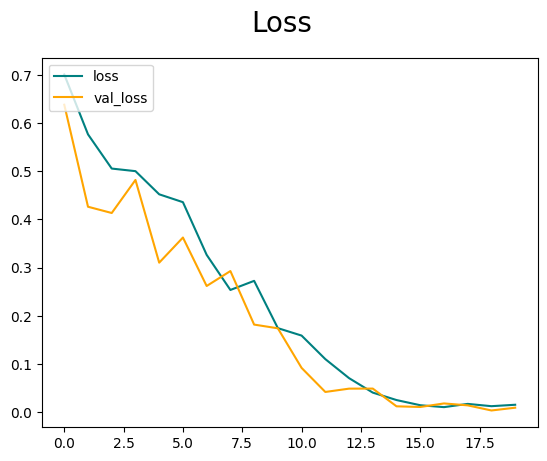

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

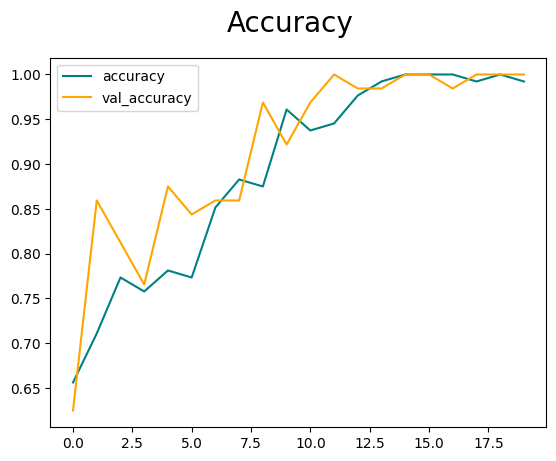

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy#confusion metrics

In [ ]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 1s 665ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


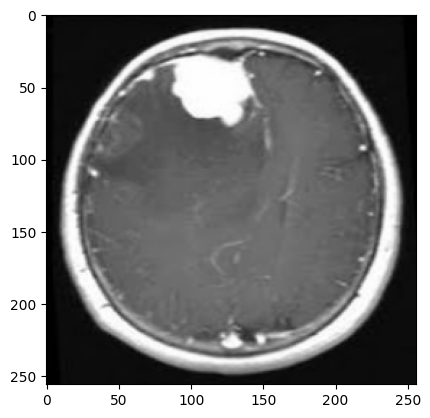

1/1 [==============================] - 0s 50ms/step
[[0.9999985]]
Tumor present


In [ ]:
img=cv2.imread('/content/drive/MyDrive/BrainTumorDetection_AI_21CSB0B18/DataSets/tumor.jpg')
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat=model.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat>0.5:

    print('Tumor present')
else:
    print('Tumor not present')

In [ ]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy#confusion metrics

In [ ]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [ ]:
from joblib import Parallel, delayed
import joblib

In [ ]:
joblib.dump(model, 'tumor_detection.pkl')

['tumor_detection.pkl']

In [ ]:
knn_from_joblib = joblib.load('tumor_detection.pkl')

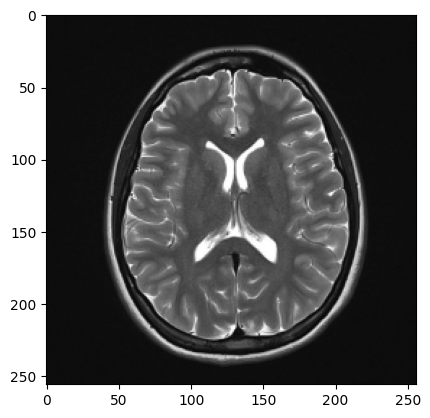

1/1 [==============================] - 0s 36ms/step
[[6.5267664e-06]]
No tumor :)


In [ ]:
img=cv2.imread('/content/drive/MyDrive/BrainTumorDetection_AI_21CSB0B18/DataSets/normalbrain.png')
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat=knn_from_joblib.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat>0.5:
    print('Tumor Present')
else:
    print('No tumor :)')